<a href="https://colab.research.google.com/github/Angie-O/Consumer-Price-Indices-Prediction/blob/main/CPI_TimeSeries_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumer Price Indices Prediction Model

Consumer Price Index (CPI) is a measure of weighted aggregate change in retail prices paid by costomers of a given basket of goods and services.
It has the following benefits;
* Measure Inflation
* An indicator of Macroeconomic Performance
* Measure Purchasing Power
* Tool in Wage negotiation
* Determinant of supplier price variation




Predicting CPI has the following benefits:
* Controlling inflation
* Accounting and Financial Planning
* Understanding future purchasing power of a Nation's currency

In this notebook,various python libraries are used to create a prediction model for consumer price indices

## About the Data
The data is from the [Kenya National Bureau of Statistics online Data Tables](https://www.knbs.or.ke/download/employment-earnings-and-consumer-price-indices-2/).

It is a table with monthly Consumer Price Indices from 2018 to 2022 and Annual Averages.

## Steps Taken
1. Importing libraries and loading the data.
2. Understanding the data.
3. Data Cleaning - format, nulls, outliers & data types
4. Time series decomposition and Visualizations - Seasonality, Trend, Noise, Stationarity, Autocorrelation.
5. Modelling - Training, Validating and Improving the prediction model

## Importing Libraries

In [281]:
# importing necessary libraries
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from statsmodels.tsa.seasonal import seasonal_decompose # For Time series decomposition
from statsmodels.tsa.arima.model import ARIMA # To build ARIMA model
from sklearn.metrics import mean_squared_error # To test model accuracy using mean squared error of actual vs predicted indices.

## Load Data

In [255]:
# Read data from Excel file into a DataFrame named cpi_data
cpi_data = pd.read_excel("/Employment-Earnings-and-Consumer-Price-Indices.xlsx", sheet_name = "Table 3.22", header = 2)

# Preview dataFrame
cpi_data

,Month,2018,2019,2020,2021,2022
0,January,94.74,99.66,106.51,112.58,118.64
1,February,96.03,100.00,107.17,113.36,119.13
2,March,97.37,101.54,107.47,113.81,120.14
3,April,98.68,102.34,108.49,114.75,122.17
4,May,99.63,103.11,108.60,114.98,123.12
5,June,98.74,103.52,108.27,115.11,124.22
6,July,97.86,103.83,108.35,115.45,125.05
7,August,98.16,104.04,108.57,115.71,125.58
8,September,99.16,104.20,108.57,116.08,126.73
9,October,98.38,104.54,109.60,116.67,127.86


## Understanding the Data

### Structure of the data

In [256]:
# Display summary information about the DataFrame
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   13 non-null     object 
 1   2018    13 non-null     float64
 2   2019    13 non-null     float64
 3   2020    13 non-null     float64
 4   2021    13 non-null     float64
 5   2022    13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 752.0+ bytes


**OBSERVATION:**
> There are 13 rows and 5 columns in the data.

> The data ranges from year 2018 to 2022.

> The columns with price data are in float data type but month is of Object type.

### Summary Statistics
* Count
* Minimum
* Maximum
* Average
* Quartiles

In [257]:
# Getting Summary Statistics exculding the last row which has annual averages
cpi_data.iloc[:-1, :].describe()

,2018,2019,2020,2021,2022
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,97.982500,103.155833,108.687500,115.330833,124.161667
std,1.376736,1.943083,1.484117,1.621405,3.575571
min,94.740000,99.660000,106.510000,112.580000,118.640000
25%,97.737500,102.140000,108.070000,114.515000,121.662500
50%,98.290000,103.675000,108.530000,115.280000,124.635000
75%,98.765000,104.285000,108.850000,116.227500,127.012500
max,99.630000,105.920000,111.870000,118.270000,128.990000


**OBSERVATIONS:**

> The mean annual Indices have been gradually increasing over the years.

> The min and max values for each year have been higher than those of the previous years.

> Therefore, there's a general increase in consumer price indices over the years.



### Columns

In [258]:
# data columns
cpi_data.columns

Index(['Month ', 2018, 2019, 2020, 2021, 2022], dtype='object')

**OBSERVATION:**

> The data has the columns Month and years 2018 to 2022 although month has a trailing spaces


## Data Cleaning

### Format Column
Removing the trailling space in month

In [259]:
# Formatting the Month column that has trailing spaces
cpi_data.rename(columns={"Month " : "month"}, inplace = True)

# Preview data
cpi_data.tail()

,month,2018,2019,2020,2021,2022
8,September,99.16,104.20,108.57,116.08,126.73
9,October,98.38,104.54,109.60,116.67,127.86
10,November,98.20,105.17,110.78,117.20,128.31
11,December,98.84,105.92,111.87,118.27,128.99
12,Annual Average,97.98,103.16,108.69,115.33,124.16


In [260]:
# Drop the last row(Annual Average) that may affect our analysis
cpi_data = cpi_data.iloc[:-1, :]

# Preview data
cpi_data.tail()

,month,2018,2019,2020,2021,2022
7,August,98.16,104.04,108.57,115.71,125.58
8,September,99.16,104.20,108.57,116.08,126.73
9,October,98.38,104.54,109.60,116.67,127.86
10,November,98.20,105.17,110.78,117.20,128.31
11,December,98.84,105.92,111.87,118.27,128.99


**OBSERVATION:**

> The last row containing Annual Averages has been dropped.

### Missing Values

In [261]:
# check for missing values in the data
cpi_data.isna().sum().sum()

0

**OBSERVATION:**

>The data has no missing values

### Duplicates

In [262]:
# check for duplicates in the data
cpi_data.duplicated().sum()

0

**OBSERVATION:**

>The data has no duplicates

### Outliers

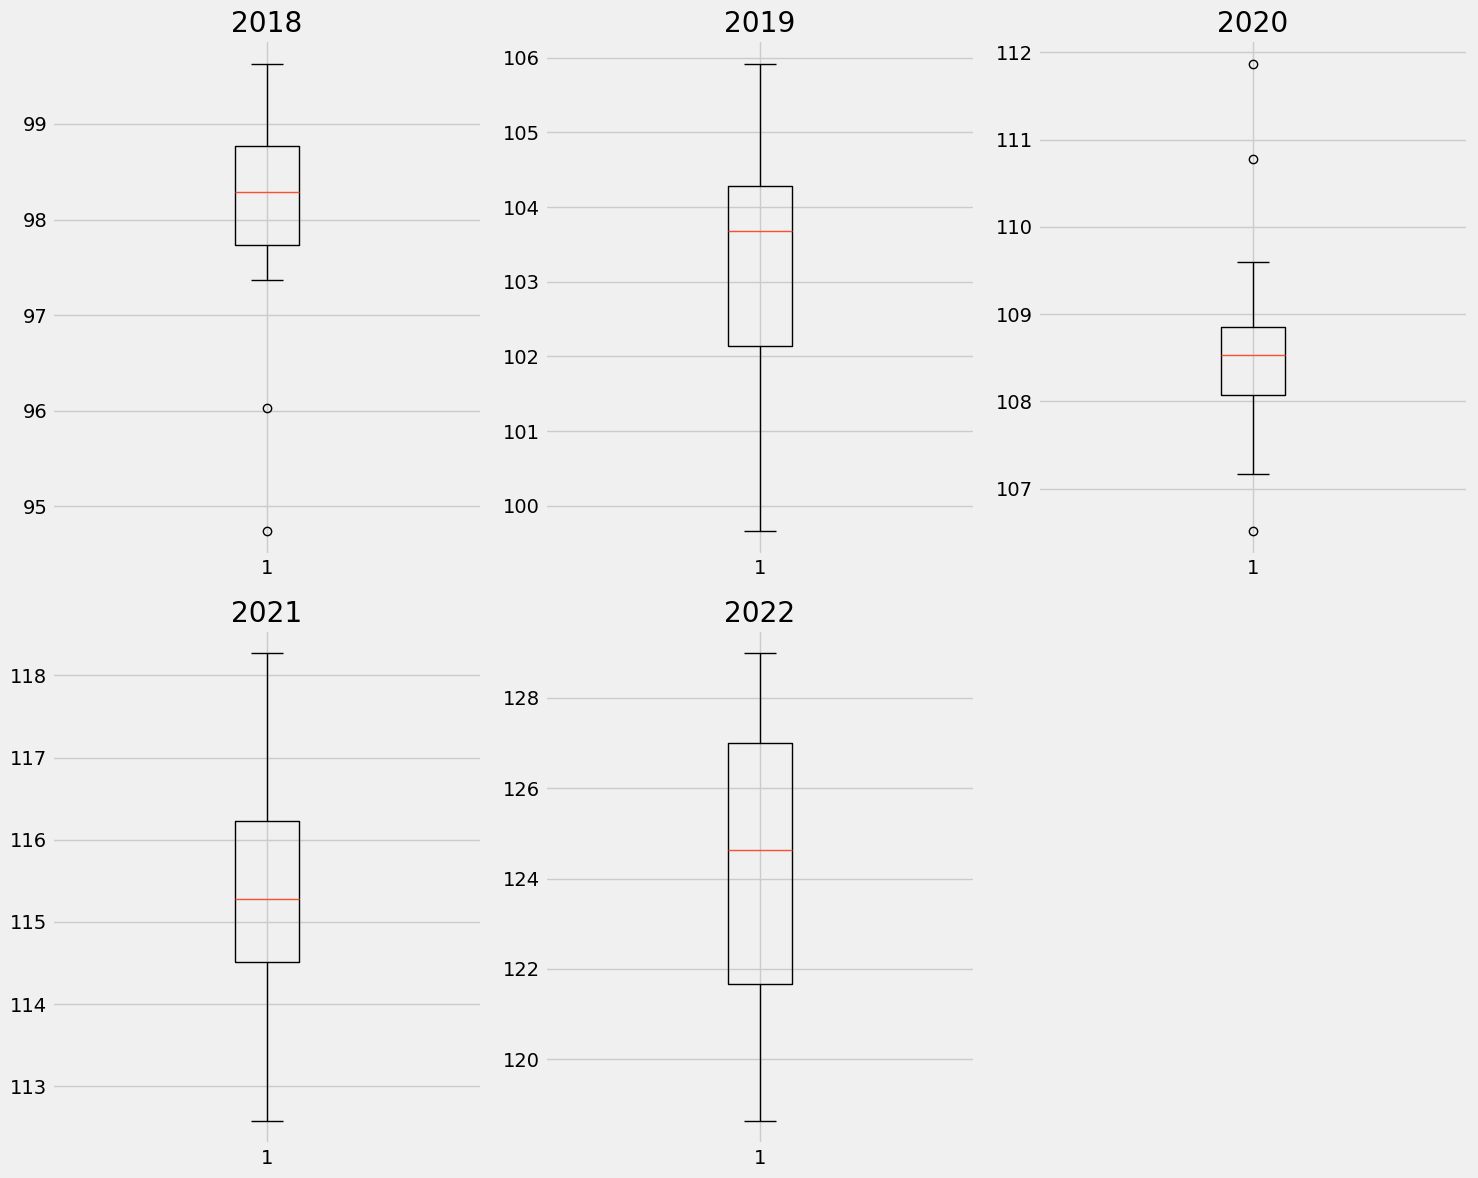

<Figure size 1500x1200 with 0 Axes>

In [263]:
# outlier detection using boxplot

# list numeric columns
numeric_columns = cpi_data.select_dtypes(include=np.number).columns.tolist()

# set plot size
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(cpi_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.figure(figsize=(15, 12))

plt.show()

**OBSERVATION:**

> 2018 and 2020 have a few outliers.

Since in this context, the outliers are still relevant, there's no need to impute or drop them.

### Data Preparation for Time Series


Convert all years to a Single column

In [264]:
# Melt the DataFrame to convert all 5 years into a single column
cpi_data = cpi_data.melt(id_vars = 'month', var_name = 'year', value_name = 'value')
cpi_data

,month,year,value
0,January,2018,94.74
1,February,2018,96.03
2,March,2018,97.37
3,April,2018,98.68
4,May,2018,99.63
5,June,2018,98.74
6,July,2018,97.86
7,August,2018,98.16
8,September,2018,99.16
9,October,2018,98.38


**OBSERVATION:**

>The data is now has 3 columns; month, year and value that improve the flow of data for analysis of Trends over time

Add a date Column in Preparation for Time series

In [265]:
# Convert 'Month' and 'Year' columns to datetime and create the 'Date' column
cpi_data = cpi_data

# Dictionary to map month names to numerical representation
month_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12,
}

# Convert 'month' and 'year' columns to datetime and create the 'date' column
cpi_data['date'] = pd.to_datetime(cpi_data['year'].astype(str) + '-' + cpi_data['month'].map(month_dict).astype(str) + '-01')

cpi_data.head()

,month,year,value,date
0,January,2018,94.74,2018-01-01
1,February,2018,96.03,2018-02-01
2,March,2018,97.37,2018-03-01
3,April,2018,98.68,2018-04-01
4,May,2018,99.63,2018-05-01


Set date Column as Index in preparation for Time Series

In [266]:
# Reset the index to the date
cpi_data = cpi_data.set_index("date")

# Preview Data
cpi_data.head()

,month,year,value
date,,,
2018-01-01,January,2018,94.74
2018-02-01,February,2018,96.03
2018-03-01,March,2018,97.37
2018-04-01,April,2018,98.68
2018-05-01,May,2018,99.63


## Visualizations and Time Series Analysis

### Visualizations

#### Comparison of Monthly Trends in Consumer Price Indices for years 2018 to 2022

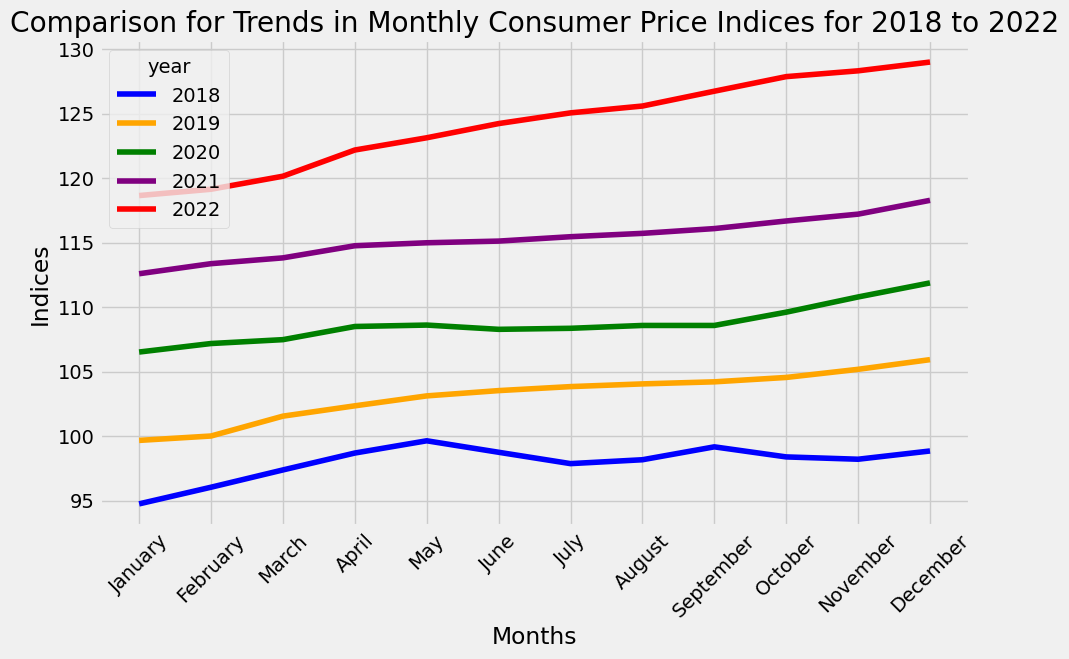

In [267]:
# Set up size for the plot
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot( data = cpi_data, x='month', y = 'value', hue = 'year', palette = ["blue", "orange", "green", "purple", "red"])

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45)

# Add a title and labels to the plot
plt.title("Comparison for Trends in Monthly Consumer Price Indices for 2018 to 2022")
plt.xlabel("Months")
plt.ylabel("Indices")

# Show the plot
plt.show()

**OBSERVATIONS:**


> For all the 5 years, data in January started at a low index and kept rising as time went by.

> Apart from in 2018, the December index has been the highest for the other years.

#### Trend in Consumer Price Indices from 2018 to 2022

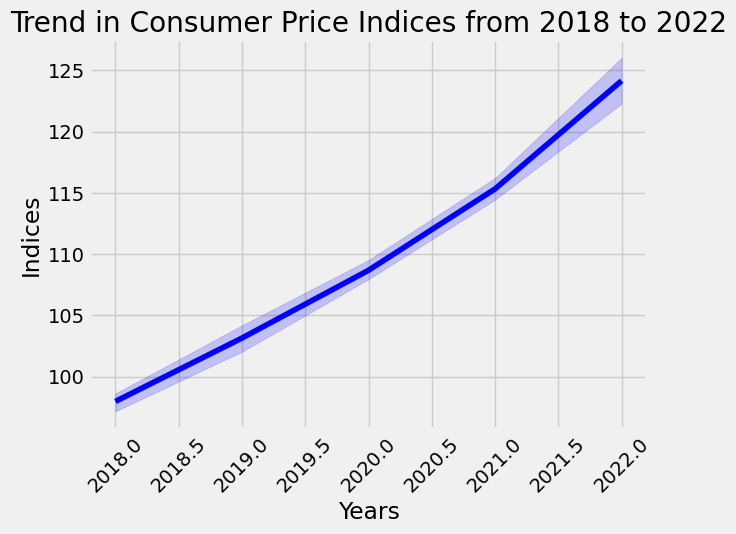

In [268]:
sns.lineplot(data = cpi_data, y = "value", x = "year", color = "Blue")

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45);

# Add a title and labels to the plot
plt.title("Trend in Consumer Price Indices from 2018 to 2022")
plt.xlabel("Years")
plt.ylabel("Indices");

**OBSERVATION:**

> There has been a Noticeable Rise in Consumer Price Indices in Kenya over the years

### Time Series Analysis

#### Time Series Components
* Trend
* Seasonality
* Noise

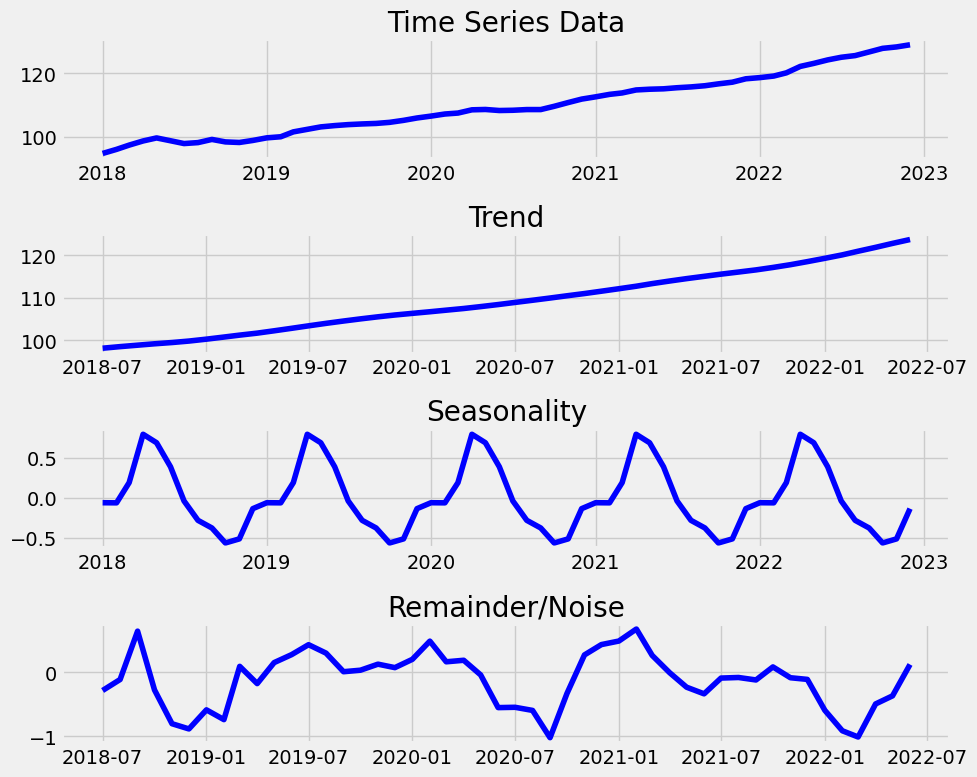

In [269]:
# Decompose the time series
decomposition = seasonal_decompose(cpi_data['value'], model='additive', period=12)  # Assuming frequency=4

# Create the trend component
trend = decomposition.trend

# Create the seasonality component
season = decomposition.seasonal

# Create the remainder component
remainder = decomposition.resid

# Plot the components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)

plt.plot(cpi_data["value"], color="Blue")
plt.title('Time Series Data')
plt.subplot(4, 1, 2)

plt.plot(trend, color="Blue")
plt.title("Trend")
plt.subplot(4, 1, 3)

plt.plot(season, color="Blue")
plt.title("Seasonality")
plt.subplot(4, 1, 4)

plt.plot(remainder, color="Blue")
plt.title("Remainder/Noise")

plt.tight_layout()
plt.show()


OBSERVATIONS;

> On **trend**, the data follows a consistent upwards or downward slope.

> On **seasonality**, the data displays a clear periodic pattern which is an increase over time.

> On **remainder/noise**, there are some outlier points that are not consistent with the rest of the data.

#### Test for Stationarity

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In [270]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(cpi_data["value"])

# Print test statistic
print(result[0])

# Print p-value
p_value  = result[1]
print(p_value )

# Print critical values
print(result[4])

print("-" * 30)

# Checking the p-value against a significance level (e.g., 0.05) to determine stationarity
if p_value <= 0.05:
    print("Reject the null hypothesis: The time series data is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series data is not stationary.")

2.2870202372947874
0.998946789983928
{'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}
------------------------------
Fail to reject the null hypothesis: The time series data is not stationary.


Since the Time Series is not Stationary, it will require Differencing. ARIMA model's Integrated Differencing component will be useful when creating the model

## Modelling

### Spliting the data to train and test datasets.



train_data with data from 2018 to 2021 will be used to train a model that will predict future Indices.

test_data will have future values (2022 indices) which will be used to test the accuracy of the machine learning model's prediction.

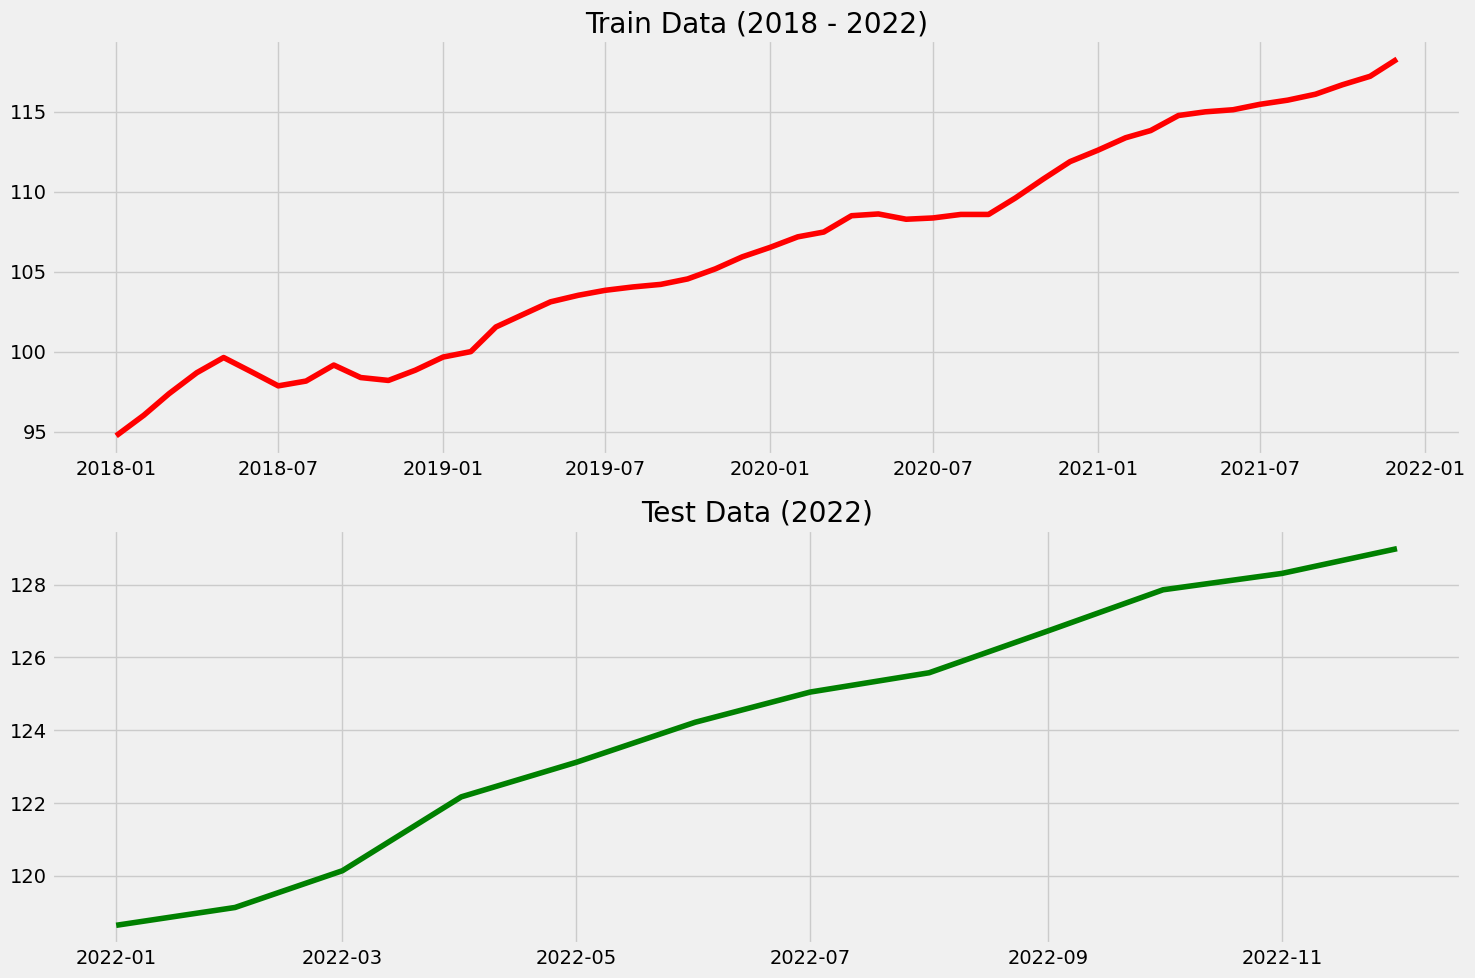

In [271]:
# Split the data into a train and test set
train_data = cpi_data[cpi_data.index.year < 2022]
test_data = cpi_data[cpi_data.index.year > 2021]

# Plot the train and test datasets
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(train_data["value"], color="Red")
plt.title('Train Data (2018 - 2022)')
plt.subplot(2, 1, 2)
plt.plot(test_data["value"], color="Green")
plt.title("Test Data (2022)")
plt.tight_layout()
plt.show()

### Prediction using ARIMA model

In [272]:
# Import the ARIMA model
# from statsmodels.tsa.arima.model import ARIMA

# Create ARIMA(2,1,2) model
arima = ARIMA(train_data["value"], order = (1,3,1))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 12 values
arima_value_forecast = arima_results.get_forecast(steps=len(test_data)).predicted_mean

# Print forecast
print(arima_value_forecast)

2022-01-01    119.247952
2022-02-01    120.232721
2022-03-01    121.208841
2022-04-01    122.178732
2022-05-01    123.142015
2022-06-01    124.098751
2022-07-01    125.048928
2022-08-01    125.992549
2022-09-01    126.929614
2022-10-01    127.860123
2022-11-01    128.784075
2022-12-01    129.701470
Freq: MS, Name: predicted_mean, dtype: float64


#### Testing Accuracy of the Model

In [273]:
# Compare the forecasted values with the actual values in the test set
mse = mean_squared_error(test_data["value"], arima_value_forecast)

# Printing MSE and MAE
print("Mean Squared Error (MSE): {:.4f}".format(mse))

Mean Squared Error (MSE): 0.3070


The model is not 100% accurate. It has a Mean Squared Error (MSE): 0.3070

### Improve Model Performance - Hyperparameter Tuning

Systematically searching for the best combination of hyperparameters to optimize the model's performance.

In [274]:

# Initialize variables to store the best model and its corresponding performance
best_model = None
best_mse = float('inf')  # Initialize with a large value

# Hyperparameter tuning loop - Finding the best parameters
for p in range(5):  # Range of p
    for d in range(4):  # Range of d
        for q in range(5):  # Range of q

            # Create ARIMA model
            arima = ARIMA(train_data["value"], order = (p,q,d))

            # Fit ARIMA model
            arima_results = arima.fit()

            # Make ARIMA forecast equal to the length of test dataset (12 in this case)
            arima_value_forecast = arima_results.forecast(steps=len(test_data))

            # Calculate Mean Squared Error (MSE) of forecasted and actual values
            mse = mean_squared_error(test_data["value"], arima_value_forecast)

            # Update best model only if the current model performs better than previous
            if mse < best_mse:
                best_mse = mse
                best_model = arima_results


In [275]:
# Print the performance metrics for the best model
print("Mean Squared Error (MSE): {:.4f}".format(best_mse))

Mean Squared Error (MSE): 0.2132


The best model has a Mean Squared Error of 0.2132
There is an improvement in model performance after Hyperparameter Tuning.

In [276]:
# Print the best model's parameters
print("Best Model Parameters: {}".format(best_model.model_orders))

Best Model Parameters: {'trend': 0, 'exog': 0, 'ar': 4, 'ma': 1, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 4, 'reduced_ma': 1, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}


The best model identified has an autoregressive order of 2, no moving average component, and no trend or exogenous variables.

The best model includes autoregressive terms in the reduced form and has a variance parameter of 1.

In [277]:
# Make final forecast using the best model
arima_value_forecast = best_model.forecast(steps = len(test_data))

# Print the forecasted values
print("Final Forecasted Values:")
print(arima_value_forecast)

Final Forecasted Values:
2022-01-01    119.235112
2022-02-01    120.136305
2022-03-01    121.012286
2022-04-01    122.037670
2022-05-01    122.992986
2022-06-01    123.893003
2022-07-01    124.787661
2022-08-01    125.720412
2022-09-01    126.611231
2022-10-01    127.468361
2022-11-01    128.319927
2022-12-01    129.173605
Freq: MS, Name: predicted_mean, dtype: float64


In [278]:
# Actual 2022 Values
print("Actual 2022 Values:")
test_data['value']

Actual 2022 Values:


date
2022-01-01    118.64
2022-02-01    119.13
2022-03-01    120.14
2022-04-01    122.17
2022-05-01    123.12
2022-06-01    124.22
2022-07-01    125.05
2022-08-01    125.58
2022-09-01    126.73
2022-10-01    127.86
2022-11-01    128.31
2022-12-01    128.99
Name: value, dtype: float64

Comparing Forecasted values with the actual 2022 values

In [279]:
# Concatenate horizontally
result_df = pd.concat([test_data, arima_value_forecast], axis=1)

# Reset then drop index
result_df.reset_index(inplace=True)
result_df = result_df.drop('index', axis=1, errors='ignore')

# Rename columns
result_df.rename(columns={'value': 'Actual Index', 'predicted_mean': 'Predicted Value'}, inplace=True)

# Round the 'Predicted Value' column to two decimal places
result_df['Predicted Value'] = result_df['Predicted Value'].round(2)

# Display the modified DataFrame
# print(result_df)

result_df

,month,year,Actual Index,Predicted Value
0,January,2022,118.64,119.24
1,February,2022,119.13,120.14
2,March,2022,120.14,121.01
3,April,2022,122.17,122.04
4,May,2022,123.12,122.99
5,June,2022,124.22,123.89
6,July,2022,125.05,124.79
7,August,2022,125.58,125.72
8,September,2022,126.73,126.61
9,October,2022,127.86,127.47


Graphical Visualization of the Train Data, Test Data and Predicted Values

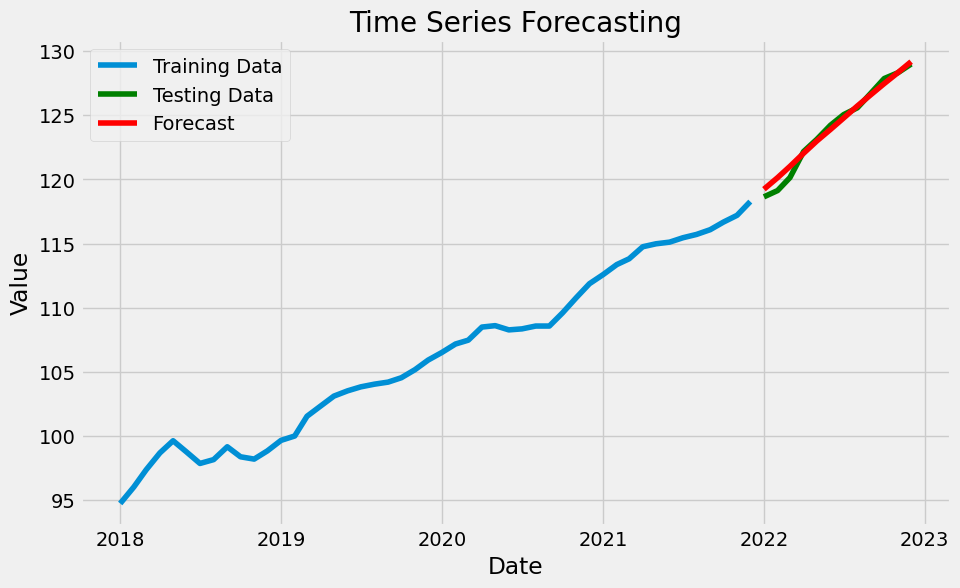

In [280]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data["value"], label='Training Data')
plt.plot(test_data.index, test_data["value"], color = "Green",label='Testing Data')
plt.plot(test_data.index, arima_value_forecast, label='Forecast', color='red')
plt.legend()
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

The prediction model isn't 100% accurate.

It has a Mean Squared Error of 0.2132.

The model may be improved by:
1. Using **more historical data** from previous years.
2. **Adding other variables** that may affect Consumer Price Index.
Like Consumer Spending Habits, Money Supply, forex exchange rates.
3. **Considering market conditions** like political instability, war, rapid technological change, financial crisis.